# Assignment 1

## Exercise 1.1

rough sketch for ex 1.2:

1. define the „positive“ subspace P in the RGB cube
2. iterate over all pixels in I and check if in P or ~P
3. write result to new image
4. play around with size and shape of P and display binary image (**RESULT**)



/Users/timohaffner/PycharmProjects/cv201718_assignments/venv/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Users/timohaffner/PycharmProjects/cv201718_assignments/venv/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


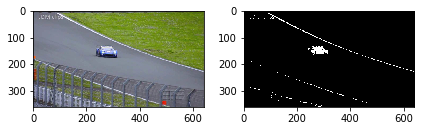

In [23]:
from skimage import io, data, color, morphology
import numpy as np

image = io.imread('images/racecar/000.jpeg')
width, height, blub = image.shape

mask = np.zeros_like(image[:,:,0])
mask2 = np.zeros_like(image[:,:,0])

for y in range(0,height):
    for x in range(0,width):
        if image[x,y,2] > 200:
            mask[x,y] = 255

morphology.erosion(mask, out=mask2)

io.imshow_collection([image, mask])

## Exercise 1.2

* starting from the binary color detection image
* erase noise with an erosion operation
* dilate once to get original size of object
* find connected components with one-pass algorithm
* extract bounding box on the fly
* draw bounding box on original image (**RESULT**)

## Exercise 1.3

* use your color detection and connected components algorithm
* implement simplest tracking algorithm
* draw history of all previous points on frame (**RESULT**)